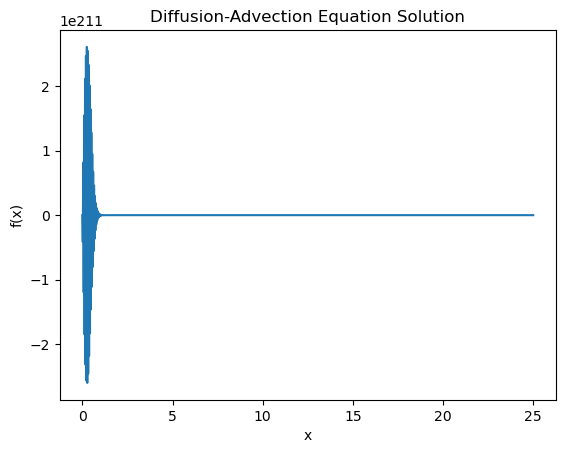

In [26]:
# The one-dimensional Diffusion-Advection equation is
# D (d^2f(x))/(dx^2) - d/dx (v(x)f(x)) = 0
# where v(x) is some velocity field that advects particles around. The first
# term is the diffusion term that tends to spread particles.

#Use a second order finite difference scheme to solve the diffusion-
#advection with D = 2 and v(x) = − sin x on [0, 25] with boundary
#conditions f(0) = 1 and f(25) = 0. Use N = 1000 grid points.


#a
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 2.0
N = 1000
L = 25.0
dx = L / N 
dt = 0.001

# Velocity function
def velocity(x):
    return -np.sin(x)

# Initialize grid and solution arrays
x = np.linspace(0, L, N)
f = np.zeros(N)
f[0] = 1.0

# Time-stepping using finite difference scheme
steps = 200
for step in range(steps):
    f_new = f.copy()
    for i in range(1, N - 1):
        diffusion_term = D * (f[i + 1] - 2 * f[i] + f[i - 1]) / dx**2
        advection_term = velocity(x[i]) * (f[i + 1] - f[i - 1]) / (2 * dx)
        f_new[i] = f[i] + dt * (diffusion_term - advection_term)
    f = f_new

# Plot the solution
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solution')
plt.show()

